# Importing libraries

In [1]:
import os
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from math import sqrt
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_curve, auc, mean_squared_error
from sklearn.preprocessing import Normalizer,MinMaxScaler
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from xgboost import XGBRegressor, plot_importance 
import scikitplot as skplt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


# Spending data

In [2]:
data = pd.read_excel('data.xlsx')

In [3]:
data.head()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,1,127.87
1,2,1,0,0,0,0,1,0,0,0,...,0,0,0,2900,2900,1,1,0,0,0.00
2,3,1,0,0,0,0,0,0,0,0,...,0,0,2,3883,3914,0,0,0,1,127.48
3,4,1,0,1,0,0,0,0,0,0,...,0,0,1,829,829,0,1,0,0,0.00
4,5,1,0,1,0,0,0,0,0,0,...,0,0,1,869,869,0,0,0,0,0.00


# Data Description
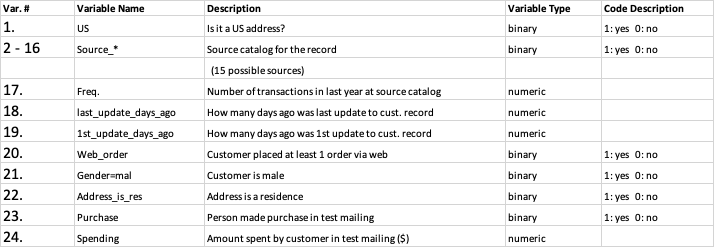

# Segmenting target and predictor data

In [4]:
X = data.drop(['sequence_number', 'Spending', 'Purchase'], axis=1)
Y = data[['Spending']]
# Log transformation
Y = np.log(Y + 1)

# Spliting target and predictor data into training and testing

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)

# Scaling the data using MinMaxScaler

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression

In [50]:
clf = LinearRegression()
clf.fit(X_train, Y_train)
yPrediction = clf.predict(X_test)

## The coefficients of all the features 

In [51]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, clf.coef_[0][idx]))

The coefficient for US is 0.1209117173916412
The coefficient for source_a is 1.8164201850155903
The coefficient for source_c is 0.25502661013131905
The coefficient for source_b is 0.3212727994714858
The coefficient for source_d is 1.0212617496514933
The coefficient for source_e is 0.6903667679199413
The coefficient for source_m is 1.4018142105762812
The coefficient for source_o is 0.07607977389534328
The coefficient for source_h is -1.6483358648322917
The coefficient for source_r is 0.950417340640591
The coefficient for source_s is 0.4309793143359623
The coefficient for source_t is 1.1558503197898247
The coefficient for source_u is 1.7318219377444186
The coefficient for source_p is 1.8419677046460436
The coefficient for source_x is 0.5278475584993365
The coefficient for source_w is 1.1304018749541822
The coefficient for Freq is 0.9323839852445075
The coefficient for last_update_days_ago is -8.326982035580074e-05
The coefficient for 1st_update_days_ago is -1.446994212408865e-05
The coef

## Intercept of the model

In [52]:
intercept = clf.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.21118711321540395


## Evalutation of the model

In [53]:
from sklearn.metrics import mean_squared_error
y_predict = clf.predict(X_test)
clf_mse = mean_squared_error(y_predict, Y_test)
sqrt(clf_mse)
clf.score(X_test, Y_test)
scores = cross_val_score(clf, X_train, Y_train, cv=7,scoring='r2')
print(scores)
print("Mean R^2 Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("The R^2 for our model is {}".format(clf.score(X_test, Y_test)))
print("The MSE for our model is {}".format(clf_mse))
print("The RMSE for our model is {}".format(sqrt(clf_mse)))

[0.41248353 0.41454365 0.46889268 0.44553386 0.36226606 0.46657799
 0.40869291]
Mean R^2 Score: 0.43 (+/- 0.07)
The R^2 for our model is 0.3985403169285193
The MSE for our model is 3.856577180998952
The RMSE for our model is 1.963816992746257


# KNN

In [54]:
clf = KNeighborsRegressor()
p_grid = {'weights':["uniform", "distance"], 'n_neighbors' : list(range(1,31)),
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid = GridSearchCV(estimator = clf, param_grid = p_grid, cv = 10, n_jobs = -1, scoring = 'r2')
grid.fit(X_train_scaled, Y_train)
finalparam = grid.best_params_
print('Best Hyperparamters:', grid.best_params_ )
print('Best R^2:', grid.best_score_)

Best Hyperparamters: {'algorithm': 'brute', 'n_neighbors': 25, 'weights': 'uniform'}
Best R^2: 0.2708696111686738


## Evalutation of the model

In [55]:
clf_KNN = KNeighborsRegressor(n_neighbors= finalparam['n_neighbors'],
                              weights= finalparam['weights'], algorithm =finalparam['algorithm'])
clf_KNN.fit(X_train_scaled, Y_train)
pred=clf_KNN.predict(X_test_scaled)
error = sqrt(mean_squared_error(Y_test,pred))
scores = cross_val_score(clf_KNN, X_train_scaled, Y_train, cv=10,scoring='r2')
print(scores)
print("Mean R^2 Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("The R^2 for our model is {}".format(clf_KNN.score(X_test_scaled, Y_test)))
print("The MSE for our model is {}".format(mean_squared_error(Y_test,pred)))
print('RMSE value for k =' , finalparam['n_neighbors'] , 'is:', error)

[0.18966779 0.26334833 0.25713692 0.30688238 0.29054792 0.35507734
 0.2174848  0.29359196 0.27618177 0.2587769 ]
Mean R^2 Score: 0.27 (+/- 0.09)
The R^2 for our model is 0.20334418980795677
The MSE for our model is 5.108180490182132
RMSE value for k = 25 is: 2.2601284233826475


# Regression Tree

In [56]:
clf = DecisionTreeRegressor()
p_grid = {"max_depth": list(range(1,30)), "criterion" : ['mse'], 'min_samples_leaf' : list(range(1,30))}
grid = GridSearchCV(estimator = clf, param_grid = p_grid, cv = 10, n_jobs = -1, scoring = 'r2')
grid.fit(X_train, Y_train)
finalparam = grid.best_params_
print('Best Hyperparamters:', grid.best_params_ )
print('Best R^2:', grid.best_score_)

Best Hyperparamters: {'criterion': 'mse', 'max_depth': 11, 'min_samples_leaf': 25}
Best R^2: 0.5304341831471913


## Evalutation of the model

In [57]:
clf_RT = DecisionTreeRegressor(max_depth= finalparam['max_depth'], criterion= finalparam['criterion'],
                               min_samples_leaf =finalparam['min_samples_leaf'])
clf_RT.fit(X_train, Y_train)
pred=clf_RT.predict(X_test)
error = sqrt(mean_squared_error(Y_test,pred))
scores = cross_val_score(clf_RT, X_train, Y_train, cv=10,scoring='r2')
print(scores)
print("Mean R^2 Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("The R^2 for our model is {}".format(clf_RT.score(X_test, Y_test)))
print("The MSE for our model is {}".format(mean_squared_error(Y_test,pred)))
print('RMSE value is:', error)

[0.54243994 0.61476188 0.46122361 0.62290884 0.49739337 0.50342182
 0.42697415 0.46877112 0.5953032  0.57117008]
Mean R^2 Score: 0.53 (+/- 0.13)
The R^2 for our model is 0.4785771072098259
The MSE for our model is 3.343378927272273
RMSE value is: 1.8284908879379937


# SVM Regression

In [58]:
clf = SVR()
p_grid = {'kernel':['linear', 'poly', 'rbf', 'sigmoid' ], 'C' : [0.001,0.1,1,10,100],
          'degree': list(range(3,8)), 'gamma': ['auto', 'scale']}
grid = GridSearchCV(estimator = clf, param_grid = p_grid, cv = 10, n_jobs = -1)
grid.fit(X_train_scaled, Y_train)
finalparam = grid.best_params_
print('Best Hyperparamters:', grid.best_params_ )
print('Best R^2:', grid.best_score_)

Best Hyperparamters: {'C': 100, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}
Best R^2: 0.4143025962249809


## Evalutation of the model

In [59]:
clf_SVR = SVR(kernel= finalparam['kernel'], C = finalparam['C'], degree = finalparam['degree'],
                   gamma = finalparam['gamma'])
clf_SVR.fit(X_train_scaled, Y_train)
pred=clf_SVR.predict(X_test_scaled)
error = sqrt(mean_squared_error(Y_test,pred))
scores = cross_val_score(clf_SVR, X_train_scaled, Y_train, cv= 10,scoring='r2')
print(scores)
print("Mean R^2 Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("The R^2 for our model is {}".format(clf_SVR.score(X_test_scaled, Y_test)))
print("The MSE for our model is {}".format(mean_squared_error(Y_test,pred)))
print('RMSE value is:', error)

[0.32364918 0.49900151 0.34975345 0.52960539 0.37790008 0.46995236
 0.35253514 0.39811911 0.45406893 0.3884408 ]
Mean R^2 Score: 0.41 (+/- 0.13)
The R^2 for our model is 0.44401544789981806
The MSE for our model is 3.5649893034686695
RMSE value is: 1.8881179262611405


# Lasso

In [60]:
clf = Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True,
            max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
clf.fit(X_train, Y_train)
yPrediction = clf.predict(X_test)

## The coeficients of all the features 

In [61]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, clf.coef_[idx]))

The coefficient for US is 0.0
The coefficient for source_a is 0.0
The coefficient for source_c is -0.0
The coefficient for source_b is -0.0
The coefficient for source_d is 0.0
The coefficient for source_e is -0.0
The coefficient for source_m is 0.0
The coefficient for source_o is -0.0
The coefficient for source_h is -0.0
The coefficient for source_r is 0.0
The coefficient for source_s is -0.0
The coefficient for source_t is 0.0
The coefficient for source_u is 0.0
The coefficient for source_p is 0.0
The coefficient for source_x is -0.0
The coefficient for source_w is 0.0
The coefficient for Freq is 0.013975923583872426
The coefficient for last_update_days_ago is -0.0014643087694839944
The coefficient for 1st_update_days_ago is 0.001352608516062533
The coefficient for Web order is 0.0
The coefficient for Gender=male is -0.0
The coefficient for Address_is_res is -0.0


## Intercept of the model

In [62]:
intercept = clf.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 2.364759363776967


## Evaluation of the model

In [63]:
from sklearn.metrics import mean_squared_error
y_predict = clf.predict(X_test)
clf_mse = mean_squared_error(y_predict, Y_test)
sqrt(clf_mse)
clf.score(X_test, Y_test)
scores = cross_val_score(clf, X_train, Y_train, cv=10,scoring='r2')
print(scores)
print("Mean R^2 Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("The R^2 for our model is {}".format(clf.score(X_test, Y_test)))
print("The MSE for our model is {}".format(clf_mse))
print("The RMSE for our model is {}".format(sqrt(clf_mse)))

[0.01320924 0.14280771 0.13419051 0.19764897 0.11217497 0.2029983
 0.18283428 0.17214051 0.14855585 0.22689272]
Mean R^2 Score: 0.15 (+/- 0.11)
The R^2 for our model is 0.18503782785387557
The MSE for our model is 5.225561421550107
The RMSE for our model is 2.285948691801744


# Ridge

In [64]:
clf = Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None,
            tol=0.001, solver='auto', random_state=None)
clf.fit(X_train, Y_train)
yPrediction = clf.predict(X_test)

## The coeficients of all the features

In [65]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, clf.coef_[0][idx]))

The coefficient for US is 0.12332367839376611
The coefficient for source_a is 1.6708673521060111
The coefficient for source_c is 0.1174646800857079
The coefficient for source_b is 0.18483466930593725
The coefficient for source_d is 0.8696518721983908
The coefficient for source_e is 0.5528248423309198
The coefficient for source_m is 1.2159272148194449
The coefficient for source_o is -0.05353538680987461
The coefficient for source_h is -1.7647596198123152
The coefficient for source_r is 0.8075615038314967
The coefficient for source_s is 0.29318350254625486
The coefficient for source_t is 0.9881318135457113
The coefficient for source_u is 1.5870916580046903
The coefficient for source_p is 1.5132588347175153
The coefficient for source_x is 0.37619023999455026
The coefficient for source_w is 0.9906037900315195
The coefficient for Freq is 0.9370880199135779
The coefficient for last_update_days_ago is -7.89662024056106e-05
The coefficient for 1st_update_days_ago is -1.8601809132703022e-05
The

## Intercept of the model

In [66]:
intercept = clf.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.3379745810603061


## Evaluation of the model

In [67]:
from sklearn.metrics import mean_squared_error
y_predict = clf.predict(X_test)
clf_mse = mean_squared_error(y_predict, Y_test)
sqrt(clf_mse)
clf.score(X_test, Y_test)
scores = cross_val_score(clf, X_train, Y_train, cv=10,scoring='r2')
print(scores)
print("Mean R^2 Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("The R^2 for our model is {}".format(clf.score(X_test, Y_test)))
print("The MSE for our model is {}".format(clf_mse))
print("The RMSE for our model is {}".format(sqrt(clf_mse)))

[0.37220098 0.49705438 0.34834326 0.50135764 0.44746671 0.48671717
 0.34633616 0.41537472 0.45089522 0.40103216]
Mean R^2 Score: 0.43 (+/- 0.11)
The R^2 for our model is 0.3974618995877144
The MSE for our model is 3.863492024712005
The RMSE for our model is 1.9655767664255712


# Random Forest

In [68]:
clf_R = RandomForestRegressor()
p_grid = {"max_depth": [3, None],
              'n_estimators':[8,12,16,18,20,24,30],
              "max_features": [1, 3, 10, 'auto'],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False]}
grid = GridSearchCV(estimator = clf_R, param_grid = p_grid, cv = 10, n_jobs = -1)
grid.fit(X_train, Y_train)
finalparam = grid.best_params_
print('Best Hyperparamters:', grid.best_params_ )
print('Best R^2:', grid.best_score_)

Best Hyperparamters: {'bootstrap': True, 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 20}
Best R^2: 0.5630702615215557


## Evaluation of the model

In [69]:
clf_RF = RandomForestRegressor(bootstrap = finalparam['bootstrap'], max_depth = finalparam['max_depth'],
                               max_features = finalparam['max_features'],
                               min_samples_leaf = finalparam['min_samples_leaf'],
                               min_samples_split = finalparam['min_samples_split'],
                               n_estimators = finalparam['n_estimators'])
clf_RF.fit(X_train, Y_train)
pred=clf_RF.predict(X_test)
error = sqrt(mean_squared_error(Y_test,pred))
scores = cross_val_score(clf_SVR, X_train_scaled, Y_train, cv=10,scoring='r2')
print(scores)
print("Mean R^2 Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("The R^2 for our model is {}".format(clf_RF.score(X_test, Y_test)))
print("The MSE for our model is {}".format(mean_squared_error(Y_test,pred)))
print('RMSE value is:', error)

[0.32364918 0.49900151 0.34975345 0.52960539 0.37790008 0.46995236
 0.35253514 0.39811911 0.45406893 0.3884408 ]
Mean R^2 Score: 0.41 (+/- 0.13)
The R^2 for our model is 0.5472405135542961
The MSE for our model is 2.903107145919521
RMSE value is: 1.7038506818144368


## Feature Importance

In [70]:
feature_important = []
column_names = []
for idx, col_name in enumerate(X_train.columns):
    print("The importance of feature {} is {}".format(col_name, clf_RF.feature_importances_[idx]))
    feature_important.append(clf_RF.feature_importances_[idx])
    column_names.append(col_name)

The importance of feature US is 0.009438659940730629
The importance of feature source_a is 0.027548098913314688
The importance of feature source_c is 0.012648732410510118
The importance of feature source_b is 0.004882887684024733
The importance of feature source_d is 0.003453757126812787
The importance of feature source_e is 0.011874768347979129
The importance of feature source_m is 0.002045659732608998
The importance of feature source_o is 0.002046594864507494
The importance of feature source_h is 0.06374058986429253
The importance of feature source_r is 0.0036455551205565174
The importance of feature source_s is 0.003806277601080677
The importance of feature source_t is 0.0014578649461480949
The importance of feature source_u is 0.0231148191680045
The importance of feature source_p is 0.0
The importance of feature source_x is 0.0012902479811352252
The importance of feature source_w is 0.00787374555785556
The importance of feature Freq is 0.4861411775723325
The importance of feature l

## Visualization of feature importance

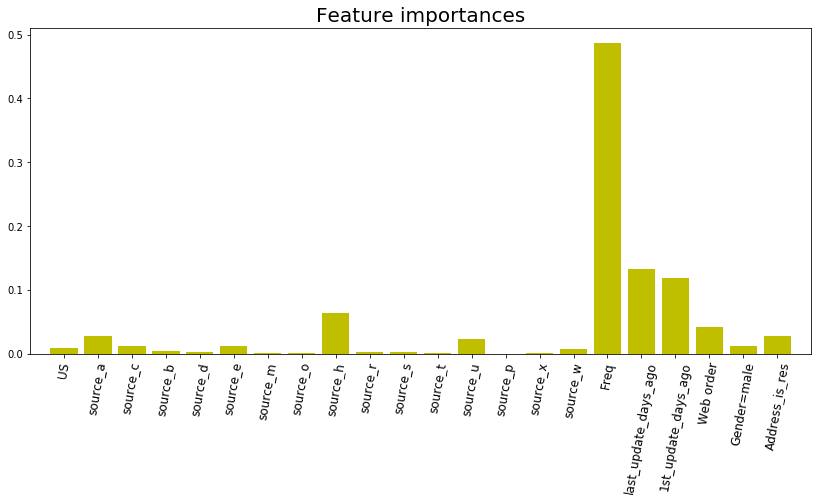

In [71]:
plt.figure(figsize=(14, 6))
plt.title("Feature importances",size=20)
plt.bar(range(X.shape[1]), feature_important,
       color='y' , align="center")
plt.xticks(range(X.shape[1]), column_names,rotation=80,fontsize = 12)
plt.xlim([-1, X.shape[1]])
plt.show()

# Ada Boosting

In [72]:
clf = AdaBoostRegressor()
p_grid = {"n_estimators": list(range(10,100,10)),
              "base_estimator": [DecisionTreeRegressor()],
              'learning_rate':[0.3,0.5,0.7,1.0], 'loss' : ['linear', 'square', 'exponential']}
grid = GridSearchCV(estimator = clf, param_grid = p_grid, cv = 10, n_jobs = -1)
grid.fit(X_train, Y_train)
finalparam = grid.best_params_
print('Best Hyperparamters:', grid.best_params_)
print('Best R^2:', grid.best_score_)

Best Hyperparamters: {'base_estimator': DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best'), 'learning_rate': 1.0, 'loss': 'exponential', 'n_estimators': 90}
Best R^2: 0.47825590336014456


## Evalation of the model

In [73]:
clf_AD = AdaBoostRegressor(n_estimators = finalparam['n_estimators'], learning_rate = finalparam['learning_rate'],
             base_estimator = finalparam['base_estimator'], loss = finalparam['loss'])
clf_AD.fit(X_train, Y_train)
pred=clf_AD.predict(X_test)
error = sqrt(mean_squared_error(Y_test,pred))
scores = cross_val_score(clf_AD, X_train, Y_train, cv=10,scoring='r2')
print(scores)
print("Mean R^2 Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("The R^2 for our model is {}".format(clf_AD.score(X_test, Y_test)))
print("The MSE for our model is {}".format(mean_squared_error(Y_test,pred)))
print('RMSE value is:', error)

[0.44725149 0.50221887 0.54137025 0.51870496 0.54013247 0.33265094
 0.25778505 0.44255637 0.56337699 0.48001435]
Mean R^2 Score: 0.46 (+/- 0.19)
The R^2 for our model is 0.40392240445630445
The MSE for our model is 3.822067077445879
RMSE value is: 1.955010761465491


# Gradient Boosting

In [74]:
clf = GradientBoostingRegressor()
p_grid = {"n_estimators": list(range(100,300,50)), 'max_depth':list(range(2,20,2)),
              'min_samples_split' : list(range(2,20,2)),
              'learning_rate':[0.3,0.6,1.0], 'loss' : ['ls', 'lad']}
grid = RandomizedSearchCV(estimator = clf, param_distributions = p_grid, cv = 10, n_jobs = -1)
grid.fit(X_train, Y_train)
finalparam = grid.best_params_
print('Best Hyperparamters:', grid.best_params_)
print('Best R^2:', grid.best_score_)

Best Hyperparamters: {'n_estimators': 100, 'min_samples_split': 8, 'max_depth': 4, 'loss': 'ls', 'learning_rate': 0.3}
Best R^2: 0.5406678119730792


## Evaluation of the model

In [75]:
clf_GB = GradientBoostingRegressor(n_estimators = finalparam['n_estimators'],
                                   learning_rate = finalparam['learning_rate'],
             max_depth = finalparam['max_depth'], loss = finalparam['loss'],
                                   min_samples_split = finalparam['min_samples_split'] )
clf_GB.fit(X_train, Y_train)
pred=clf_GB.predict(X_test)
error = sqrt(mean_squared_error(Y_test,pred))
scores = cross_val_score(clf_GB, X_train, Y_train, cv=10,scoring='r2')
print(scores)
print("Mean R^2 Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("The R^2 for our model is {}".format(clf_GB.score(X_test, Y_test)))
print("The MSE for our model is {}".format(mean_squared_error(Y_test,pred)))
print('RMSE value is:', error)

[0.49958707 0.5687849  0.46231701 0.59728342 0.58578278 0.55632205
 0.41534996 0.5790359  0.54646019 0.59754475]
Mean R^2 Score: 0.54 (+/- 0.12)
The R^2 for our model is 0.5274966007193113
The MSE for our model is 3.029705695824296
RMSE value is: 1.7406049798343954


# XGBoost

In [76]:
clf = XGBRegressor(objective ='reg:squarederror')
p_grid = {'max_depth': [2,3,5], 'gamma' : np.arange(0.1, 0.7, 0.1),
              'subsample':[0.5,0.6,0.7,0.8],'colsample_bytree':[0.5,0.6,0.7,0.8]}
grid = GridSearchCV(estimator = clf, param_grid = p_grid, cv = 10, n_jobs = -1)
grid.fit(X_train, Y_train)
finalparam = grid.best_params_
print('Best Hyperparamters:', grid.best_params_)
print('Best R^2:', grid.best_score_)

Best Hyperparamters: {'colsample_bytree': 0.8, 'gamma': 0.4, 'max_depth': 5, 'subsample': 0.7}
Best R^2: 0.5794045698341069


## Evaluation of the model

In [77]:
clf_XG = XGBRegressor(objective ='reg:squarederror', max_depth = finalparam['max_depth'],
                           gamma = finalparam['gamma'],
             subsample = finalparam['subsample'], colsample_bytree = finalparam['colsample_bytree'])
clf_XG.fit(X_train, Y_train)
pred=clf_XG.predict(X_test)
error = sqrt(mean_squared_error(Y_test,pred))
scores = cross_val_score(clf_XG, X_train, Y_train, cv=10,scoring='r2')
print(scores)
print("Mean R^2 Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("The R^2 for our model is {}".format(clf_XG.score(X_test, Y_test)))
print("The MSE for our model is {}".format(mean_squared_error(Y_test,pred)))
print('RMSE value is:', error)

[0.5655602  0.63485459 0.52314976 0.63904814 0.651861   0.54765286
 0.44002704 0.61133745 0.56791168 0.61264297]
Mean R^2 Score: 0.58 (+/- 0.12)
The R^2 for our model is 0.5477110757329302
The MSE for our model is 2.9000898873875873
RMSE value is: 1.7029650282338704


# Neural Network

## Spilting the data for neural network analysis 

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
TRAINING_SIZE = X_train.shape[0]
features = X.shape[1]
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Building neural network with two hidden layers

In [115]:
model = Sequential()
#First Hidden Layer
model.add(Dense(100, activation='relu', input_dim = X_train_scaled.shape[1]))  
#Second Hidden Layer
model.add(Dense(80, activation='relu'))
model.add(Dense(1, activation='relu'))
#Compiling the neural network
model.compile(optimizer ='adam',loss='mse', metrics =['mae', 'mse'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 100)               2300      
_________________________________________________________________
dense_15 (Dense)             (None, 80)                8080      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 81        
Total params: 10,461
Trainable params: 10,461
Non-trainable params: 0
_________________________________________________________________


## Fitting the model

In [116]:
model_info = model.fit(X_train_scaled, Y_train, batch_size=10, epochs=200, verbose=0, validation_split=0.2)

## Evaluation of the model

In [117]:
print("Loss and MAE on Training Data")
eval_model=model.evaluate(X_train_scaled, Y_train)
print('Loss: ',eval_model[0], 'and', 'MAE:',eval_model[1])
print('*' * 50)
print("Loss and MAE on Test Data")
result=model.evaluate(X_test_scaled, Y_test)
print('Loss: ',result[0], 'and', 'MAE:',result[1])

Loss and MAE on Training Data
1600/1600 [==============================] - 0s 17us/step
Loss:  1.9739178746938706 and MAE: 0.8603249192237854
**************************************************
Loss and MAE on Test Data
400/400 [==============================] - 0s 17us/step
Loss:  3.6583613109588624 and MAE: 1.1982791423797607


## Visualization of the loss for training and test data

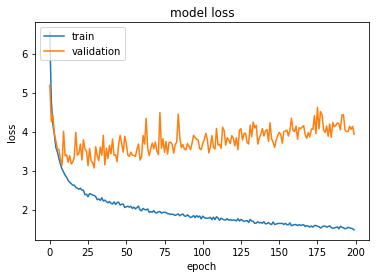

In [118]:
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Visualization of the mse for training and test data

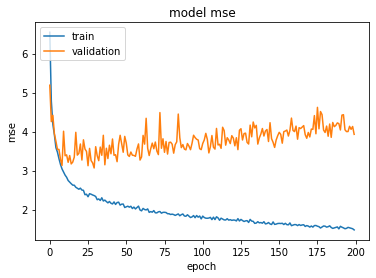

In [119]:
plt.plot(model_info.history['mse'])
plt.plot(model_info.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Visualization of the mae for training and test data

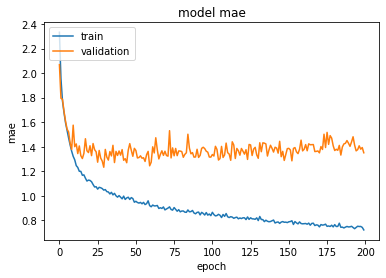

In [120]:
plt.plot(model_info.history['mae'])
plt.plot(model_info.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Deep Neural Network

## Building the model with mutliple hidden layers

In [96]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim = X_train_scaled.shape[1]))  
model.add(Dense(80, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(optimizer ='adam',loss='mse', metrics =['mae', 'mse'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               2300      
_________________________________________________________________
dense_10 (Dense)             (None, 80)                8080      
_________________________________________________________________
dense_11 (Dense)             (None, 60)                4860      
_________________________________________________________________
dense_12 (Dense)             (None, 10)                610       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 11        
Total params: 15,861
Trainable params: 15,861
Non-trainable params: 0
_________________________________________________________________


## Fitting the model

In [97]:
model_info = model.fit(X_train_scaled, Y_train, batch_size=10, epochs=200, verbose=0, validation_split=0.2)

## Evaluation of the model

In [98]:
print("Loss and MAE on Training Data")
eval_model=model.evaluate(X_train_scaled, Y_train)
print('Loss: ',eval_model[0], 'and', 'MAE:',eval_model[1])
print('*' * 50)
print("Loss and MAE on Test Data")
result=model.evaluate(X_test_scaled, Y_test)
print('Loss: ',result[0], 'and', 'MAE:',result[1])

Loss and MAE on Training Data
1600/1600 [==============================] - 0s 28us/step
Loss:  1.8314746695756912 and MAE: 0.7480514645576477
**************************************************
Loss and MAE on Test Data
400/400 [==============================] - 0s 22us/step
Loss:  3.9301705169677734 and MAE: 1.1905632019042969


## Visualization of the loss for training and test data

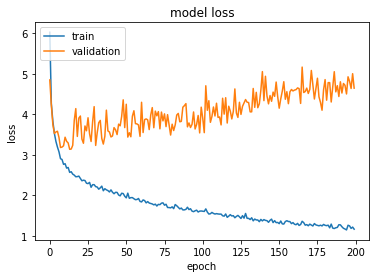

In [99]:
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Visualization of the mse for training and test data

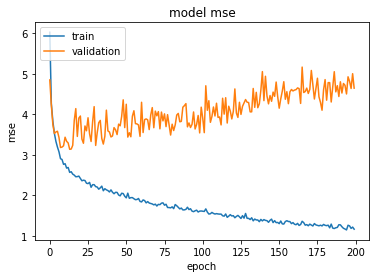

In [100]:
plt.plot(model_info.history['mse'])
plt.plot(model_info.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Visualization of the mae for training and test data

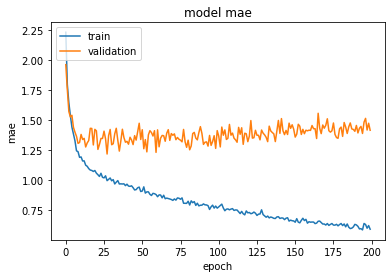

In [101]:
plt.plot(model_info.history['mae'])
plt.plot(model_info.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Using early stopping for the model 

In [110]:
earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=5,
                          verbose=2, mode='auto')
callbacks_list = [earlystop]
model_info = model.fit(X_train_scaled, Y_train, batch_size=10,
                       epochs=200, callbacks=callbacks_list, verbose=2,
                       validation_split=0.2)

Train on 1280 samples, validate on 320 samples
Epoch 1/200
 - 0s - loss: 1.0991 - mae: 0.5697 - mse: 1.0991 - val_loss: 4.8199 - val_mae: 1.4754 - val_mse: 4.8199
Epoch 2/200
 - 0s - loss: 1.1429 - mae: 0.5856 - mse: 1.1429 - val_loss: 4.8449 - val_mae: 1.4553 - val_mse: 4.8449
Epoch 3/200
 - 0s - loss: 1.1353 - mae: 0.5799 - mse: 1.1353 - val_loss: 4.9257 - val_mae: 1.4756 - val_mse: 4.9257
Epoch 4/200
 - 0s - loss: 1.1585 - mae: 0.5959 - mse: 1.1585 - val_loss: 4.4412 - val_mae: 1.3811 - val_mse: 4.4412
Epoch 5/200
 - 0s - loss: 1.1752 - mae: 0.5978 - mse: 1.1752 - val_loss: 4.7964 - val_mae: 1.4476 - val_mse: 4.7964
Epoch 6/200
 - 0s - loss: 1.1068 - mae: 0.5719 - mse: 1.1068 - val_loss: 4.9530 - val_mae: 1.5002 - val_mse: 4.9530
Epoch 7/200
 - 0s - loss: 1.1454 - mae: 0.5889 - mse: 1.1454 - val_loss: 4.7420 - val_mae: 1.4189 - val_mse: 4.7420
Epoch 8/200
 - 0s - loss: 1.1010 - mae: 0.5607 - mse: 1.1010 - val_loss: 5.1298 - val_mae: 1.5229 - val_mse: 5.1298
Epoch 9/200
 - 0s - loss:

## Evaluation of the model

In [111]:
print("Loss and MAE on Training Data")
eval_model=model.evaluate(X_train_scaled, Y_train)
print('Loss: ',eval_model[0], 'and', 'MAE:',eval_model[1])
print('*' * 50)
print("Loss and MAE on Test Data")
result=model.evaluate(X_test_scaled, Y_test)
print('Loss: ',result[0], 'and', 'MAE:',result[1])

Loss and MAE on Training Data
1600/1600 [==============================] - 0s 27us/step
Loss:  1.8117927193641663 and MAE: 0.739722728729248
**************************************************
Loss and MAE on Test Data
400/400 [==============================] - 0s 20us/step
Loss:  4.134869976043701 and MAE: 1.2374722957611084


## Visualization of the loss for training and test data

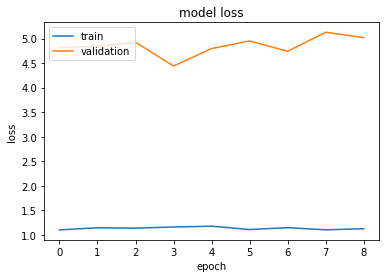

In [112]:
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Visualization of the mse for training and test data

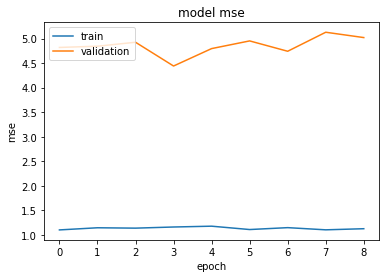

In [113]:
plt.plot(model_info.history['mse'])
plt.plot(model_info.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Visualization of the mae for training and test data

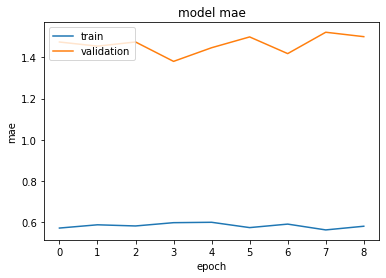

In [114]:
plt.plot(model_info.history['mae'])
plt.plot(model_info.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Setting purchase equal to 1
# Loading the data

In [121]:
data1 = data[data['Purchase'] == 1]

# Segmenting target and predictor data

In [122]:
X = data1.drop(['sequence_number', 'Spending','Purchase'], axis=1)
Y = data1[['Spending']]
# Log transformation
Y = np.log(Y + 1)

# Spliting target and predictor data into training and testing 

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)

# Scaling the data using MinMaxScaler

In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regresssion

In [125]:
clf = LinearRegression()
clf.fit(X_train, Y_train)
yPrediction = clf.predict(X_test)

## The coeficients of all the features

In [126]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, clf.coef_[0][idx]))

The coefficient for US is -0.17172783190877144
The coefficient for source_a is 0.2832343155913391
The coefficient for source_c is -0.10872076608635958
The coefficient for source_b is 0.2769882600653772
The coefficient for source_d is 0.18447758334294267
The coefficient for source_e is 0.05070854995874982
The coefficient for source_m is 0.0906786431792244
The coefficient for source_o is 0.0303833211831694
The coefficient for source_h is -0.47541668346214
The coefficient for source_r is 0.2945196245172954
The coefficient for source_s is -0.23974853789031889
The coefficient for source_t is 0.07673964062751952
The coefficient for source_u is 0.06578394828222367
The coefficient for source_p is -0.09747593975091155
The coefficient for source_x is -0.15152519554678023
The coefficient for source_w is 0.17863189633386223
The coefficient for Freq is 0.24118180222149702
The coefficient for last_update_days_ago is -0.00017192159572798496
The coefficient for 1st_update_days_ago is 9.900224805884705

## Intercept of the model

In [127]:
intercept = clf.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 4.608627390832903


## Evaluation of the model

In [128]:
from sklearn.metrics import mean_squared_error
y_predict = clf.predict(X_test)
clf_mse = mean_squared_error(y_predict, Y_test)
sqrt(clf_mse)
clf.score(X_test, Y_test)
scores = cross_val_score(clf, X_train, Y_train, cv=7,scoring='r2')
print(scores)
print("Mean R^2 Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("The R^2 for our model is {}".format(clf.score(X_test, Y_test)))
print("The MSE for our model is {}".format(clf_mse))
print("The RMSE for our model is {}".format(sqrt(clf_mse)))

[0.21216776 0.41756124 0.23455716 0.25820336 0.26523832 0.2321356
 0.25775474]
Mean R^2 Score: 0.27 (+/- 0.13)
The R^2 for our model is 0.2813153732267104
The MSE for our model is 0.6512135677229722
The RMSE for our model is 0.8069780466177331


# KNN

In [129]:
clf = KNeighborsRegressor()
p_grid = {'weights':["uniform", "distance"], 'n_neighbors' : list(range(1,31)),
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid = GridSearchCV(estimator = clf, param_grid = p_grid, cv = 10, n_jobs = -1, scoring = 'r2')
grid.fit(X_train_scaled, Y_train)
finalparam = grid.best_params_
print('Best Hyperparamters:', grid.best_params_ )
print('Best R^2:', grid.best_score_)

Best Hyperparamters: {'algorithm': 'ball_tree', 'n_neighbors': 30, 'weights': 'uniform'}
Best R^2: 0.06642507077417673


## Evaluation of the model

In [130]:
clf_KNN = KNeighborsRegressor(n_neighbors= finalparam['n_neighbors'],
                              weights= finalparam['weights'], algorithm =finalparam['algorithm'])
clf_KNN.fit(X_train_scaled, Y_train)
pred=clf_KNN.predict(X_test_scaled)
error = sqrt(mean_squared_error(Y_test,pred))
scores = cross_val_score(clf_KNN, X_train_scaled, Y_train, cv=10,scoring='r2')
print(scores)
print("Mean R^2 Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("The R^2 for our model is {}".format(clf_KNN.score(X_test_scaled, Y_test)))
print("The MSE for our model is {}".format(mean_squared_error(Y_test,pred)))
print('RMSE value for k =' , finalparam['n_neighbors'] , 'is:', error)

[0.05537072 0.01185519 0.07160437 0.00746942 0.07968116 0.09906608
 0.04215175 0.11528125 0.09583899 0.08593179]
Mean R^2 Score: 0.07 (+/- 0.07)
The R^2 for our model is 0.11585495600434102
The MSE for our model is 0.8011403431155125
RMSE value for k = 30 is: 0.8950644351752071


# Regression Tree

In [132]:
clf = DecisionTreeRegressor()
p_grid = {"max_depth": list(range(1,30)), "criterion" : ['mse'], 'min_samples_leaf' : list(range(1,30))}
grid = GridSearchCV(estimator = clf,verbose = 0, param_grid = p_grid, cv = 10, n_jobs = -1, scoring = 'r2')
grid.fit(X_train, Y_train)
finalparam = grid.best_params_
print('Best Hyperparamters:', grid.best_params_ )
print('Best R^2:', grid.best_score_)

Best Hyperparamters: {'criterion': 'mse', 'max_depth': 4, 'min_samples_leaf': 28}
Best R^2: 0.23089180871730167


## Evaluation of the model

In [133]:
clf_RT = DecisionTreeRegressor(max_depth= finalparam['max_depth'], criterion= finalparam['criterion'],
                               min_samples_leaf =finalparam['min_samples_leaf'])
clf_RT.fit(X_train, Y_train)
pred=clf_RT.predict(X_test)
error = sqrt(mean_squared_error(Y_test,pred))
scores = cross_val_score(clf_RT, X_train, Y_train, cv=10,scoring='r2')
print(scores)
print("Mean R^2 Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("The R^2 for our model is {}".format(clf_RT.score(X_test, Y_test)))
print("The MSE for our model is {}".format(mean_squared_error(Y_test,pred)))
print('RMSE value is:', error)

[0.22392107 0.09502501 0.44442331 0.26584055 0.19121771 0.2567116
 0.21093034 0.12100236 0.16940245 0.33044369]
Mean R^2 Score: 0.23 (+/- 0.19)
The R^2 for our model is 0.2148407467725343
The MSE for our model is 0.7114474687187863
RMSE value is: 0.8434734546616072


# SVR

In [134]:
clf = SVR()
p_grid = {'kernel':['linear', 'poly', 'rbf', 'sigmoid' ], 'C' : [0.001,0.1,1,10,100],
          'degree': list(range(3,8)), 'gamma': ['auto', 'scale']}
grid = GridSearchCV(estimator = clf, param_grid = p_grid, cv = 10,verbose = 0,n_jobs = -1, scoring = 'r2')
grid.fit(X_train_scaled, Y_train)
finalparam = grid.best_params_
print('Best Hyperparamters:', grid.best_params_ )
print('Best Score:', grid.best_score_)

Best Hyperparamters: {'C': 100, 'degree': 3, 'gamma': 'auto', 'kernel': 'linear'}
Best Score: 0.2334722229476761


## Evaluation of the model

In [136]:
clf_SVR = SVR(kernel= finalparam['kernel'], C = finalparam['C'], degree = finalparam['degree'],
                   gamma = finalparam['gamma'])
clf_SVR.fit(X_train_scaled, Y_train)
pred=clf_SVR.predict(X_test_scaled)
error = sqrt(mean_squared_error(Y_test,pred))
scores = cross_val_score(clf_SVR, X_train_scaled, Y_train, cv=10,scoring='r2')
print(scores)
print("Mean R^2 Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("The R^2 for our model is {}".format(clf_SVR.score(X_test_scaled, Y_test)))
print("The MSE for our model is {}".format(mean_squared_error(Y_test,pred)))
print('RMSE value is:', error)

[0.23139351 0.18855979 0.51678965 0.17893484 0.29683571 0.17880873
 0.26486751 0.05964663 0.19443541 0.22445047]
Mean R^2 Score: 0.23 (+/- 0.22)
The R^2 for our model is 0.28914284896396714
The MSE for our model is 0.6441209457143314
RMSE value is: 0.8025714583227661


# Lasso

In [137]:
clf = Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True,
            max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
clf.fit(X_train, Y_train)
yPrediction = clf.predict(X_test)

## The coeficients of all the features

In [138]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, clf.coef_[idx]))

The coefficient for US is -0.0
The coefficient for source_a is 0.0
The coefficient for source_c is -0.0
The coefficient for source_b is 0.0
The coefficient for source_d is 0.0
The coefficient for source_e is -0.0
The coefficient for source_m is -0.0
The coefficient for source_o is -0.0
The coefficient for source_h is -0.0
The coefficient for source_r is 0.0
The coefficient for source_s is -0.0
The coefficient for source_t is -0.0
The coefficient for source_u is -0.0
The coefficient for source_p is -0.0
The coefficient for source_x is -0.0
The coefficient for source_w is 0.0
The coefficient for Freq is 0.0
The coefficient for last_update_days_ago is -0.0004489961231153251
The coefficient for 1st_update_days_ago is 0.00038528513119592735
The coefficient for Web order is -0.0
The coefficient for Gender=male is -0.0
The coefficient for Address_is_res is -0.0


## Intercept of the model

In [139]:
intercept = clf.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 4.874587076908188


## Evaluation of the model

In [140]:
from sklearn.metrics import mean_squared_error
y_predict = clf.predict(X_test)
clf_mse = mean_squared_error(y_predict, Y_test)
sqrt(clf_mse)
clf.score(X_test, Y_test)
scores = cross_val_score(clf, X_train, Y_train, cv=7,scoring='r2')
print(scores)
print("Mean R^2 Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("The R^2 for our model is {}".format(clf.score(X_test, Y_test)))
print("The MSE for our model is {}".format(clf_mse))
print("The RMSE for our model is {}".format(sqrt(clf_mse)))

[0.11083578 0.30033907 0.1400182  0.24047053 0.14632693 0.17231515
 0.09949125]
Mean R^2 Score: 0.17 (+/- 0.13)
The R^2 for our model is 0.19901724489634798
The MSE for our model is 0.7257854394041019
The RMSE for our model is 0.8519304193442689


# Ridge

In [141]:
clf = Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None,
            tol=0.001, solver='auto', random_state=None)
clf.fit(X_train, Y_train)
yPrediction = clf.predict(X_test)

## The coeficients of all the features

In [142]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, clf.coef_[0][idx]))

The coefficient for US is -0.1689358979983977
The coefficient for source_a is 0.2615768120733995
The coefficient for source_c is -0.12462622910172921
The coefficient for source_b is 0.24819813842317248
The coefficient for source_d is 0.16004428992790248
The coefficient for source_e is 0.031340765656947
The coefficient for source_m is 0.06713437775038761
The coefficient for source_o is 0.009677872309197809
The coefficient for source_h is -0.4437953871036811
The coefficient for source_r is 0.2705457195807371
The coefficient for source_s is -0.24821775486241676
The coefficient for source_t is 0.054591394925273366
The coefficient for source_u is 0.04612001081613898
The coefficient for source_p is -0.10232629530561538
The coefficient for source_x is -0.16102846695057133
The coefficient for source_w is 0.15919866594097978
The coefficient for Freq is 0.2409676279102226
The coefficient for last_update_days_ago is -0.00017156352739306865
The coefficient for 1st_update_days_ago is 9.943850808517

## Intercept of the model

In [143]:
intercept = clf.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 4.624440952571267


## Evaluation of the model

In [144]:
from sklearn.metrics import mean_squared_error
y_predict = clf.predict(X_test)
clf_mse = mean_squared_error(y_predict, Y_test)
sqrt(clf_mse)
clf.score(X_test, Y_test)
scores = cross_val_score(clf, X_train, Y_train, cv=7,scoring='r2')
print(scores)
print("Mean R^2 Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("The R^2 for our model is {}".format(clf.score(X_test, Y_test)))
print("The MSE for our model is {}".format(clf_mse))
print("The RMSE for our model is {}".format(sqrt(clf_mse)))

[0.21087567 0.4212827  0.23471731 0.26675523 0.26478833 0.23319902
 0.26538618]
Mean R^2 Score: 0.27 (+/- 0.13)
The R^2 for our model is 0.27987751440190956
The MSE for our model is 0.6525164384680784
The RMSE for our model is 0.807784896162387


# Random Forest

In [146]:
clf_R = RandomForestRegressor()
p_grid = {"max_depth": [3, None],
              'n_estimators':[8,12,16,18,20,24,30],
              "max_features": [1, 3, 10, 'auto'],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False]}
grid = GridSearchCV(estimator = clf_R, param_grid = p_grid, cv = 10, verbose = 0, n_jobs = -1, scoring = 'r2')
grid.fit(X_train, Y_train)
finalparam = grid.best_params_
print('Best Hyperparamters:', grid.best_params_ )
print('Best R^2:', grid.best_score_)

Best Hyperparamters: {'bootstrap': True, 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 18}
Best R^2: 0.2675032899811495


## Evaluation of the model

In [147]:
clf_RF = RandomForestRegressor(bootstrap = finalparam['bootstrap'], max_depth = finalparam['max_depth'],
                               max_features = finalparam['max_features'],
                               min_samples_leaf = finalparam['min_samples_leaf'],
                               min_samples_split = finalparam['min_samples_split'],
                               n_estimators = finalparam['n_estimators'])
clf_RF.fit(X_train, Y_train)
pred=clf_RF.predict(X_test)
error = sqrt(mean_squared_error(Y_test,pred))
scores = cross_val_score(clf_SVR, X_train_scaled, Y_train, cv=10,scoring='r2')
print(scores)
print("Mean R^2 Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("The R^2 for our model is {}".format(clf_RF.score(X_test, Y_test)))
print("The MSE for our model is {}".format(mean_squared_error(Y_test,pred)))
print('RMSE value is:', error)

[0.23139351 0.18855979 0.51678965 0.17893484 0.29683571 0.17880873
 0.26486751 0.05964663 0.19443541 0.22445047]
Mean R^2 Score: 0.23 (+/- 0.22)
The R^2 for our model is 0.2856615080660009
The MSE for our model is 0.6472754537449306
RMSE value is: 0.8045343086189243


## Feature Importance

In [148]:
feature_important = []
column_names = []
for idx, col_name in enumerate(X_train.columns):
    print("The importance of feature {} is {}".format(col_name, clf_RF.feature_importances_[idx]))
    feature_important.append(clf_RF.feature_importances_[idx])
    column_names.append(col_name)

The importance of feature US is 0.01635391343604378
The importance of feature source_a is 0.016357094396861564
The importance of feature source_c is 0.009949552062501548
The importance of feature source_b is 0.002731326744547273
The importance of feature source_d is 0.010110966645599052
The importance of feature source_e is 0.016569469477988596
The importance of feature source_m is 0.004781781188619784
The importance of feature source_o is 0.000988477639379313
The importance of feature source_h is 0.014712035629802972
The importance of feature source_r is 0.0212692801001905
The importance of feature source_s is 0.022384762998327565
The importance of feature source_t is 0.0035408834275387968
The importance of feature source_u is 0.017238694443084932
The importance of feature source_p is 0.0009090504047956158
The importance of feature source_x is 0.005248130812741086
The importance of feature source_w is 0.014766378368166149
The importance of feature Freq is 0.3476350576332138
The import

## Visualization of the feature importance

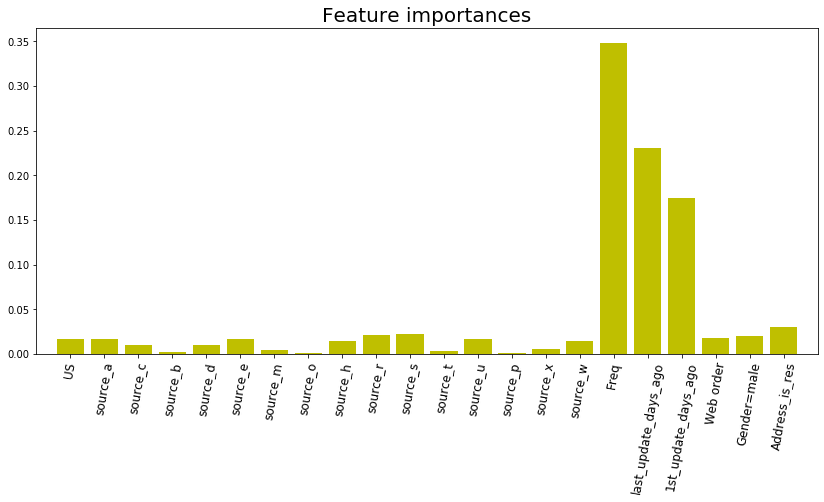

In [149]:
plt.figure(figsize=(14, 6))
plt.title("Feature importances",size=20)
plt.bar(range(X.shape[1]), feature_important,
       color='y' , align="center")
plt.xticks(range(X.shape[1]), column_names,rotation=80,fontsize = 12)
plt.xlim([-1, X.shape[1]])
plt.show()

# Ada Boosting

In [151]:
clf = AdaBoostRegressor()
p_grid = {"n_estimators": list(range(10,100,10)),
              "base_estimator": [DecisionTreeRegressor()],
              'learning_rate':[0.3,0.5,0.7,1.0], 'loss' : ['linear', 'square', 'exponential']}
grid = GridSearchCV(estimator = clf, param_grid = p_grid, cv = 10, verbose = 0, n_jobs = -1, scoring = 'r2')
grid.fit(X_train, Y_train)
finalparam = grid.best_params_
print('Best Hyperparamters:', grid.best_params_)
print('Best R^2:', grid.best_score_)

Best Hyperparamters: {'base_estimator': DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best'), 'learning_rate': 1.0, 'loss': 'exponential', 'n_estimators': 90}
Best R^2: 0.2007567032328344


## Evaluation of the model

In [152]:
clf_AD = AdaBoostRegressor(n_estimators = finalparam['n_estimators'], learning_rate = finalparam['learning_rate'],
             base_estimator = finalparam['base_estimator'], loss = finalparam['loss'])
clf_AD.fit(X_train, Y_train)
pred=clf_AD.predict(X_test)
error = sqrt(mean_squared_error(Y_test,pred))
scores = cross_val_score(clf_AD, X_train, Y_train, cv=10,scoring='r2')
print(scores)
print("Mean R^2 Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("The R^2 for our model is {}".format(clf_AD.score(X_test, Y_test)))
print("The MSE for our model is {}".format(mean_squared_error(Y_test,pred)))
print('RMSE value is:', error)

[0.30073102 0.18088151 0.3744287  0.00752331 0.45862858 0.10884926
 0.11417353 0.11782184 0.10437095 0.28591494]
Mean R^2 Score: 0.21 (+/- 0.27)
The R^2 for our model is 0.25634768539360875
The MSE for our model is 0.6738372561474592
RMSE value is: 0.8208759078858747


# Gradient Boosting

In [153]:
clf = GradientBoostingRegressor()
p_grid = {"n_estimators": list(range(100,300,50)), 'max_depth':list(range(2,20,4)),
              'min_samples_split' : list(range(2,20,4)),
              'learning_rate':[0.3,0.6,1.0], 'loss' : ['ls', 'lad']}
grid = RandomizedSearchCV(estimator = clf, param_distributions = p_grid,cv = 10,verbose= 0, n_jobs = -1,scoring = 'r2')
grid.fit(X_train, Y_train)
finalparam = grid.best_params_
print('Best Hyperparamters:', grid.best_params_)
print('Best R^2:', grid.best_score_)

Best Hyperparamters: {'n_estimators': 250, 'min_samples_split': 10, 'max_depth': 2, 'loss': 'ls', 'learning_rate': 0.3}
Best R^2: 0.1912111611903351


## Evaluation of the model

In [154]:
clf_GB = GradientBoostingRegressor(n_estimators = finalparam['n_estimators'],
                                   learning_rate = finalparam['learning_rate'],
             max_depth = finalparam['max_depth'], loss = finalparam['loss'],
                                   min_samples_split = finalparam['min_samples_split'] )
clf_GB.fit(X_train, Y_train)
pred=clf_GB.predict(X_test)
error = sqrt(mean_squared_error(Y_test,pred))
scores = cross_val_score(clf_GB, X_train, Y_train, cv=10,scoring='r2')
print(scores)
print("Mean R^2 Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("The R^2 for our model is {}".format(clf_GB.score(X_test, Y_test)))
print("The MSE for our model is {}".format(mean_squared_error(Y_test,pred)))
print('RMSE value is:', error)

[ 0.14659173  0.11388679  0.34245543  0.31508185  0.28493205  0.21047815
  0.13529889 -0.07256342  0.2420382   0.19767111]
Mean R^2 Score: 0.19 (+/- 0.23)
The R^2 for our model is 0.18632035068268182
The MSE for our model is 0.7372903324710451
RMSE value is: 0.8586561200335354


# XGBoost

In [155]:
clf = XGBRegressor(objective ='reg:squarederror')
p_grid = {'max_depth': [2,3,5], 'gamma' : np.arange(0.1, 0.7, 0.1),
              'subsample':[0.5,0.6,0.7,0.8],'colsample_bytree':[0.5,0.6,0.7,0.8]}
grid = GridSearchCV(estimator = clf, param_grid = p_grid, cv = 10, verbose = 0, n_jobs = -1, scoring = 'r2')
grid.fit(X_train, Y_train)
finalparam = grid.best_params_
print('Best Hyperparamters:', grid.best_params_)
print('Best R^2:', grid.best_score_)

Best Hyperparamters: {'colsample_bytree': 0.7, 'gamma': 0.5, 'max_depth': 3, 'subsample': 0.7}
Best R^2: 0.2861638673032992


## Evaluation of the model

In [156]:
clf_XG = XGBRegressor(objective ='reg:squarederror', max_depth = finalparam['max_depth'],
                           gamma = finalparam['gamma'],
             subsample = finalparam['subsample'], colsample_bytree = finalparam['colsample_bytree'])
clf_XG.fit(X_train, Y_train)
pred=clf_XG.predict(X_test)
error = sqrt(mean_squared_error(Y_test,pred))
scores = cross_val_score(clf_XG, X_train, Y_train, cv=10,scoring='r2')
print(scores)
print("Mean R^2 Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("The R^2 for our model is {}".format(clf_XG.score(X_test, Y_test)))
print("The MSE for our model is {}".format(mean_squared_error(Y_test,pred)))
print('RMSE value is:', error)

[0.271253   0.11200698 0.59652843 0.32066555 0.34381893 0.2386306
 0.31811102 0.15059204 0.20972567 0.30030645]
Mean R^2 Score: 0.29 (+/- 0.25)
The R^2 for our model is 0.2934692717191063
The MSE for our model is 0.6402006932240263
RMSE value is: 0.800125423433118


# Neural Network

## Spilting the data for neural network analysis 

In [157]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
TRAINING_SIZE = X_train.shape[0]
features = X.shape[1]
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Builing neural network with two hidden layers

In [158]:
model = Sequential()
#First Hidden Layer
model.add(Dense(100, activation='relu', input_dim = X_train_scaled.shape[1]))  
#Second Hidden Layer
model.add(Dense(80, activation='relu'))
model.add(Dense(1, activation='relu'))
#Compiling the neural network
model.compile(optimizer ='adam',loss='mse', metrics =['mae', 'mse'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 100)               2300      
_________________________________________________________________
dense_18 (Dense)             (None, 80)                8080      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 81        
Total params: 10,461
Trainable params: 10,461
Non-trainable params: 0
_________________________________________________________________


## Fitting the model

In [159]:
model_info = model.fit(X_train_scaled, Y_train, batch_size=10, epochs=200, verbose=0, validation_split=0.2)

## Evaluation of the model

In [160]:
print("Loss and MAE on Training Data")
eval_model=model.evaluate(X_train_scaled, Y_train)
print('Loss: ',eval_model[0], 'and', 'MAE:',eval_model[1])
print('*' * 50)
print("Loss and MAE on Test Data")
result=model.evaluate(X_test_scaled, Y_test)
print('Loss: ',result[0], 'and', 'MAE:',result[1])

Loss and MAE on Training Data
800/800 [==============================] - 0s 21us/step
Loss:  0.3274355950951576 and MAE: 0.4025478661060333
**************************************************
Loss and MAE on Test Data
200/200 [==============================] - 0s 26us/step
Loss:  0.7242035341262817 and MAE: 0.6451468467712402


## Visualization of loss for training and test data

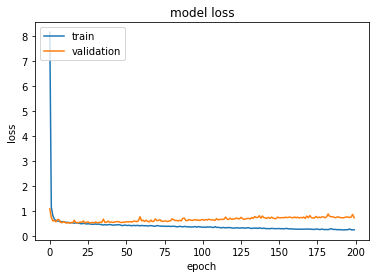

In [161]:
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Visualization of mse for training and test data

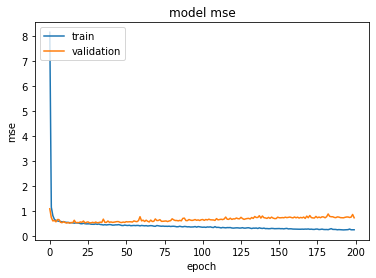

In [162]:
plt.plot(model_info.history['mse'])
plt.plot(model_info.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Visualization of mae for training and test data

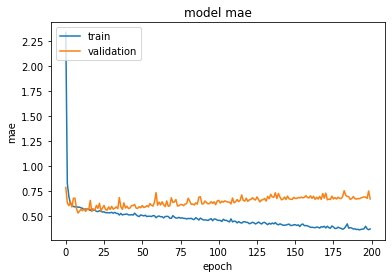

In [163]:
plt.plot(model_info.history['mae'])
plt.plot(model_info.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Deep Neural Network

## Building the model with mutliple hidden layers

In [164]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim = X_train_scaled.shape[1]))  
model.add(Dense(80, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(optimizer ='adam',loss='mse', metrics =['mae', 'mse'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 100)               2300      
_________________________________________________________________
dense_21 (Dense)             (None, 80)                8080      
_________________________________________________________________
dense_22 (Dense)             (None, 60)                4860      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                610       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 11        
Total params: 15,861
Trainable params: 15,861
Non-trainable params: 0
_________________________________________________________________


## Fitting the model 

In [165]:
model_info = model.fit(X_train_scaled, Y_train, batch_size=10, epochs=200, verbose=0, validation_split=0.2)

## Evaluation of the model 

In [166]:
print("Loss and MAE on Training Data")
eval_model=model.evaluate(X_train_scaled, Y_train)
print('Loss: ',eval_model[0], 'and', 'MAE:',eval_model[1])
print('*' * 50)
print("Loss and MAE on Test Data")
result=model.evaluate(X_test_scaled, Y_test)
print('Loss: ',result[0], 'and', 'MAE:',result[1])

Loss and MAE on Training Data
800/800 [==============================] - 0s 29us/step
Loss:  0.30681402146816256 and MAE: 0.36670753359794617
**************************************************
Loss and MAE on Test Data
200/200 [==============================] - 0s 30us/step
Loss:  0.7981597352027893 and MAE: 0.6890013217926025


## Visualization of loss for training and test data

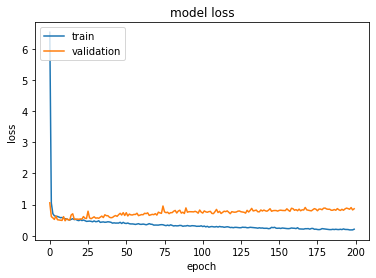

In [167]:
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Visualization of mse for training and test data

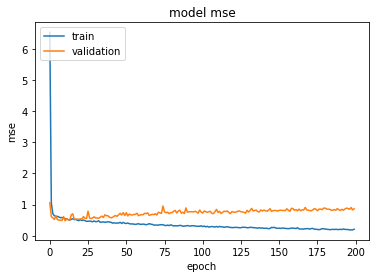

In [168]:
plt.plot(model_info.history['mse'])
plt.plot(model_info.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Visualization of mae for training and test data

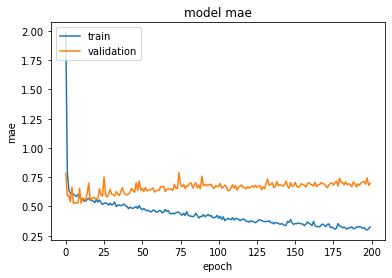

In [169]:
plt.plot(model_info.history['mae'])
plt.plot(model_info.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Using early stopping for the model

In [170]:
earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=5,
                          verbose=1, mode='auto')
callbacks_list = [earlystop]
model_info = model.fit(X_train_scaled, Y_train, batch_size=10,
                       epochs=200, callbacks=callbacks_list, verbose=1,
                       validation_split=0.2)

Train on 640 samples, validate on 160 samples
Epoch 1/200
640/640 [==============================] - 0s 170us/step - loss: 0.1946 - mae: 0.3137 - mse: 0.1946 - val_loss: 0.8410 - val_mae: 0.6929 - val_mse: 0.8410
Epoch 2/200
640/640 [==============================] - 0s 150us/step - loss: 0.1989 - mae: 0.3181 - mse: 0.1989 - val_loss: 0.8259 - val_mae: 0.6699 - val_mse: 0.8259
Epoch 3/200
640/640 [==============================] - 0s 143us/step - loss: 0.1847 - mae: 0.3036 - mse: 0.1847 - val_loss: 0.8606 - val_mae: 0.6999 - val_mse: 0.8606
Epoch 4/200
640/640 [==============================] - 0s 220us/step - loss: 0.1868 - mae: 0.3036 - mse: 0.1868 - val_loss: 0.8605 - val_mae: 0.6954 - val_mse: 0.8605
Epoch 5/200
640/640 [==============================] - 0s 274us/step - loss: 0.2004 - mae: 0.3190 - mse: 0.2004 - val_loss: 0.8889 - val_mae: 0.7017 - val_mse: 0.8889
Epoch 6/200
640/640 [==============================] - 0s 265us/step - loss: 0.1967 - mae: 0.3183 - mse: 0.1967 - val_l

## Evaluation of the model

In [171]:
print("Loss and MAE on Training Data")
eval_model=model.evaluate(X_train_scaled, Y_train)
print('Loss: ',eval_model[0], 'and', 'MAE:',eval_model[1])
print('*' * 50)
print("Loss and MAE on Test Data")
result=model.evaluate(X_test_scaled, Y_test)
print('Loss: ',result[0], 'and', 'MAE:',result[1])

Loss and MAE on Training Data
800/800 [==============================] - 0s 22us/step
Loss:  0.32519410997629167 and MAE: 0.3820248544216156
**************************************************
Loss and MAE on Test Data
200/200 [==============================] - 0s 30us/step
Loss:  0.7878346824645996 and MAE: 0.6876366138458252


## Visualization of loss for training and test data

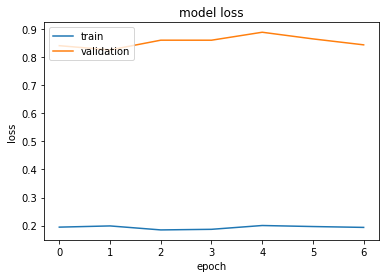

In [172]:
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Visualization of mse for training and test data

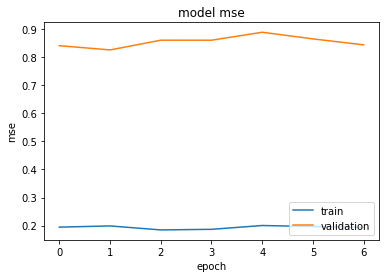

In [175]:
plt.plot(model_info.history['mse'])
plt.plot(model_info.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

## Visualization of mae for training and test data

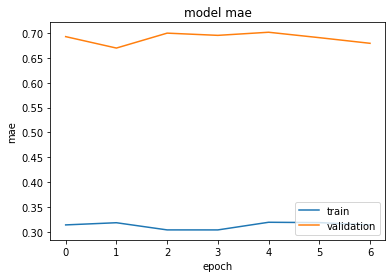

In [176]:
plt.plot(model_info.history['mae'])
plt.plot(model_info.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

# Model Evaluation of  spending data 

In [384]:
df1 = pd.DataFrame({"RMSE(Full Data)":[1.96,2.26,1.83,1.88,2.28,1.96,1.70,1.95,1.74,1.70,1.98,1.23],
                    "RMSE(Purchase = 1)":[0.80,0.89,0.84,0.80,0.85,0.80,0.80,0.82,0.85,0.80,0.64,0.68]})
df1.index = ['Linear Regression', 'KNN', 'Regression Tree', 'SVR', 'Lasso', 'Ridge', 'Random Forest', 'Ada Boosting','Gradient Boosting', 'XGBoost','Neural Network', 'Deep Neural Network']
df1

,RMSE(Full Data),RMSE(Purchase = 1)
Linear Regression,1.96,0.80
KNN,2.26,0.89
Regression Tree,1.83,0.84
SVR,1.88,0.80
Lasso,2.28,0.85
Ridge,1.96,0.80
Random Forest,1.70,0.80
Ada Boosting,1.95,0.82
Gradient Boosting,1.74,0.85
XGBoost,1.70,0.80


### Hyperparameter tuning 
For all models I have used GridsearchCV to find the optimum hyperparameters. Finaly I have used these hyperparameters in building the final models. I have also used cross validation to measure the mean performance for all models. 
### Normalization
For KNN and SVC I have used normalized data using MinMaxScaler. For all other models I have used non-scaled data. I followed the best practice of normalizing data for the models which required scaled data.

I have used the full data and build all models required. The best model for full data came out to be Deep Neural Network as it gave the minimum RMSE. The above table shows the performance comparision for all models. 

I have used the subset of data i.e. making purchase = 1 and build all models required. The best model came out to be Neural Network as it gave the minimum RMSE. The above table shows the performance comparision for all models.


I found the data to be highly skewed hence I figured that a log transformation would normalized the data properly. Further, there are a lot of USD 0.1 and USD 0.2 for non-purchase data. For this reason I think the performance of models on subset data came out to be better as compared to models build on full data.
